<a href="https://colab.research.google.com/github/Sathya-Prakash-Yuva/Hotel-Booking-Analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,5)})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Hotel Bookings.csv')

In [ ]:
#To view the top 10 rows of the table.
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
# To check how many columns has a null Values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Number of Rows and Columns
df.shape

(119390, 32)

In [ ]:
#Count of Null values for each column.
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# **We have 4 columns which has NULL values**

Agent,Company,Country,Children

Agent and company has many NULL values and Country and Children has small number of null which can be dropped


In [ ]:
#Dropping the Columns Agent and Company since it has more number of null values and those data doesn't seem to be relevant for the Analysis.
df.drop(['agent','company'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#To delete all the rows which consists of null values. Since we have a more than 1 Lakh Records we can delete a few Records.
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
#Minimum, Maximum and Average values of the numerical columns to see how spread the data is.
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


# **Findind the Unique values of all the Columns to see what kind of data we have**

In [ ]:
df['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [ ]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'babies', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
df['lead_time'].value_counts()

0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
458       1
371       1
737       1
435       1
387       1
Name: lead_time, Length: 479, dtype: int64

In [ ]:
df['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [ ]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [ ]:
df['arrival_date_week_number'].value_counts()

33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36    2167
10    2149
9     2117
7     2109
12    2083
11    2070
45    1941
53    1816
49    1782
47    1685
46    1574
6     1508
50    1505
48    1504
4     1487
5     1387
3     1319
2     1218
52    1195
1     1047
51     933
Name: arrival_date_week_number, dtype: int64

In [ ]:
df['arrival_date_day_of_month'].value_counts()

17    4406
5     4317
15    4196
25    4160
26    4147
9     4096
12    4087
16    4078
2     4055
19    4052
20    4032
18    4002
24    3993
28    3946
8     3921
3     3855
30    3853
6     3833
14    3819
27    3802
21    3767
4     3763
13    3745
7     3665
1     3626
23    3616
11    3599
22    3596
29    3580
10    3575
31    2208
Name: arrival_date_day_of_month, dtype: int64

In [ ]:
df['stays_in_weekend_nights'].value_counts()

0     51680
2     33249
1     30526
4      1849
3      1253
6       153
5        78
8        60
7        19
9        11
10        7
12        5
16        3
13        3
14        2
Name: stays_in_weekend_nights, dtype: int64

In [ ]:
df['stays_in_week_nights'].value_counts()

2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
18        6
25        6
30        5
17        4
24        3
40        2
42        1
26        1
32        1
33        1
34        1
35        1
41        1
50        1
Name: stays_in_week_nights, dtype: int64

In [ ]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [ ]:
df['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

In [ ]:
df['previous_cancellations'].value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [ ]:
df['previous_bookings_not_canceled'].value_counts()

0     115770
1       1542
2        580
3        333
4        229
       ...  
47         1
36         1
49         1
50         1
63         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

In [ ]:
df['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [ ]:
df['booking_changes'].value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
11         2
12         2
16         2
17         2
20         1
18         1
21         1
Name: booking_changes, dtype: int64

In [ ]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [ ]:
df['days_in_waiting_list'].value_counts()

0      115692
39        227
58        164
44        141
31        127
        ...  
175         1
117         1
89          1
92          1
183         1
Name: days_in_waiting_list, Length: 128, dtype: int64

In [ ]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Kids', 'total_stay'],
      dtype='object')

# **Using the Room type and Average Daily rate we have tried to find the Average price of a hotel for a each type of rooms**

In [ ]:
avg_price_hotel = df.groupby(['assigned_room_type'])['adr'].mean()

Text(0, 0.5, 'Average prices ')

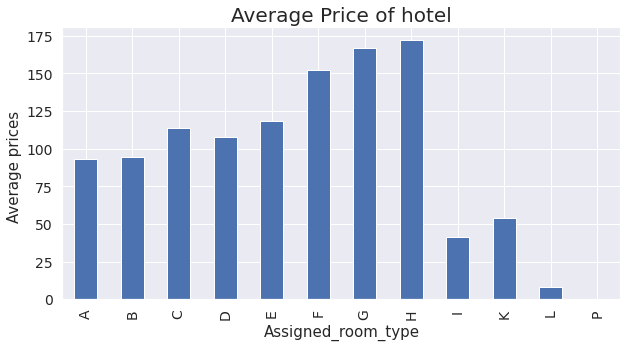

In [ ]:
ax = avg_price_hotel.plot.bar(figsize = (10,5),fontsize = 14)
ax.set_title("Average Price of hotel", fontsize = 20)
ax.set_xlabel("Assigned_room_type", fontsize = 15)
ax.set_ylabel("Average prices ", fontsize = 15)

# **To find the correlation between the Variables**

In [ ]:
corr_df = df.corr()

In [ ]:
corr_df

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Kids,total_stay
lead_time,1.000000,0.039924,0.126738,0.002320,0.083984,0.164783,0.116799,-0.038335,-0.021149,0.085961,-0.071128,0.000004,0.170007,-0.066381,-0.115561,-0.096536,-0.042022,0.155910
arrival_date_year,0.039924,1.000000,-0.540493,-0.000590,0.021669,0.031754,0.029146,0.054492,-0.013183,-0.119922,0.029800,0.031124,-0.056823,0.197857,-0.012661,0.108927,0.049541,0.032191
arrival_date_week_number,0.126738,-0.540493,1.000000,0.066839,0.017642,0.015007,0.025394,0.005494,0.010039,0.035367,-0.020768,0.005187,0.022993,0.075277,0.001717,0.025778,0.007674,0.018111
arrival_date_day_of_month,0.002320,-0.000590,0.066839,1.000000,-0.015920,-0.027608,-0.001837,0.014562,-0.000539,-0.027013,0.000118,0.010767,0.022737,0.029923,0.008262,0.003082,0.013942,-0.026845
stays_in_weekend_nights,0.083984,0.021669,0.017642,-0.015920,1.000000,0.494888,0.090410,0.045430,0.018396,-0.013008,-0.040597,0.062401,-0.054568,0.047300,-0.018147,0.071669,0.048228,0.760956
stays_in_week_nights,0.164783,0.031754,0.015007,-0.027608,0.494888,1.000000,0.091999,0.044259,0.020157,-0.014274,-0.047367,0.095665,-0.002161,0.063628,-0.024378,0.066785,0.047512,0.940370
adults,0.116799,0.029146,0.025394,-0.001837,0.090410,0.091999,1.000000,0.029590,0.017887,-0.006974,-0.105028,-0.052420,-0.008765,0.227480,0.016370,0.121815,0.032805,0.104082
children,-0.038335,0.054492,0.005494,0.014562,0.045430,0.044259,0.029590,1.000000,0.024131,-0.024752,-0.020364,0.048660,-0.033396,0.325034,0.057060,0.081786,0.971843,0.050830
babies,-0.021149,-0.013183,0.010039,-0.000539,0.018396,0.020157,0.017887,0.024131,1.000000,-0.007489,-0.006306,0.083220,-0.010648,0.028591,0.036971,0.097601,0.259013,0.022252
previous_cancellations,0.085961,-0.119922,0.035367,-0.027013,-0.013008,-0.014274,-0.006974,-0.024752,-0.007489,1.000000,0.154285,-0.027092,0.005927,-0.065930,-0.018455,-0.048585,-0.025680,-0.015749


# Correlation: Darker the colour means there is no correlation between the variables

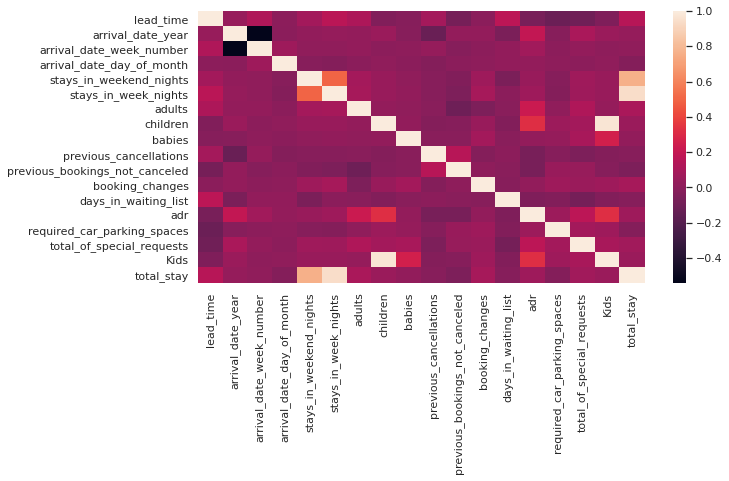

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)

### **1.Top 10 countries of the Guests**

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'babies', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df['country'].value_counts(normalize = True)[:10]

PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
ITA    0.031674
IRL    0.028386
BEL    0.019698
BRA    0.018705
NLD    0.017696
Name: country, dtype: float64

Text(0, 0.5, 'Reservation Count')

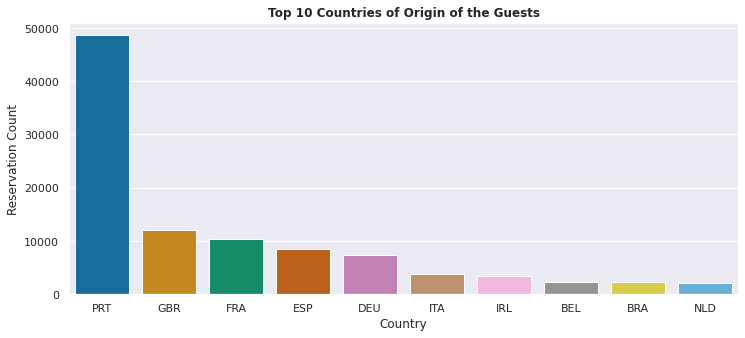

In [ ]:
sns.countplot(x='country', data=df,order=pd.value_counts(df['country']).iloc[:10].index,palette= 'colorblind')
plt.title('Top 10 Countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Reservation Count')



*   We can see the first 10 Origins of the Guests
*   Country Portugal where we have a large number of Visitors



## **2.Which month is the most occupied and which is the least occupied?**

In [ ]:
df.arrival_date_month.value_counts(normalize=True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: arrival_date_month, dtype: float64

Text(0, 0.5, 'Reservation Count')

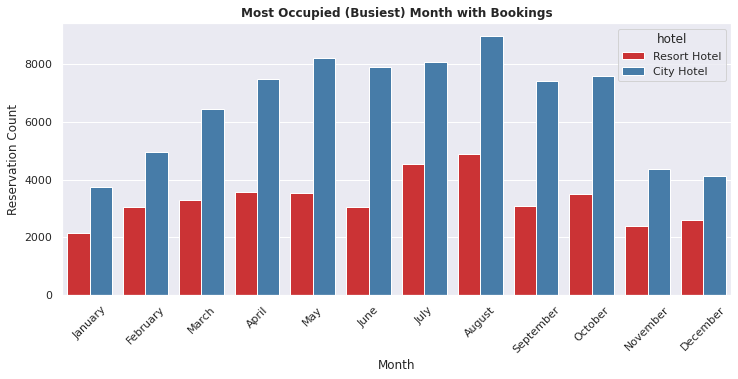

In [ ]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sns.countplot(x='arrival_date_month', data = df,hue='hotel',palette= 'Set1')
plt.title('Most Occupied (Busiest) Month with Bookings', weight='bold')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Reservation Count')



*   May,July and August are the Busiest Month for City Hotel
*   July and August are busiest for the Resorts.



# **Months which has less amount of Daily rate with respective to Hotel**

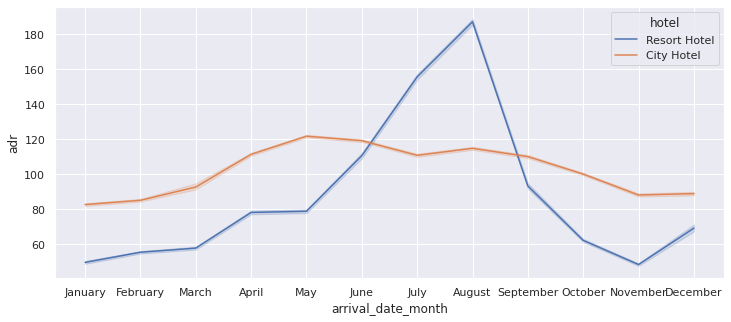

In [ ]:
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()



*   Resort hotel has a highest price during August.
*   City Hotel it varies between the range of 80-120$ of Average Daily rate.



# **What are the preferences for the people with the Children**

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0.5, 1.0, 'Number of children')

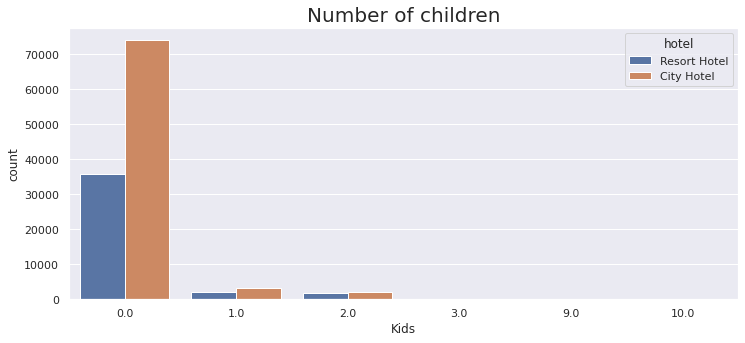

In [ ]:
df['Kids']=df['children']+df['babies']
sns.countplot(data = df, x = 'Kids', hue = 'hotel').set_title("Number of children", fontsize = 20)



*   Guests without any children have more prefrence on the City hotels(Business Meetings)



# **Total Cancellations**

In [ ]:
df['is_canceled'].value_counts(normalize = True)

0    0.628648
1    0.371352
Name: is_canceled, dtype: float64

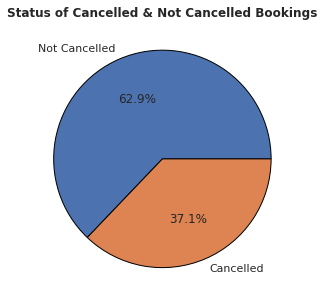

In [ ]:
Cancellation_Status = df['is_canceled'].value_counts()
labels = ['Not Cancelled','Cancelled']
plt.title('Status of Cancelled & Not Cancelled Bookings',weight = 'bold')
plt.pie(Cancellation_Status,labels=labels,autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'})
plt.show()

# **Highest Number of cancellation for Each month by Hotel**

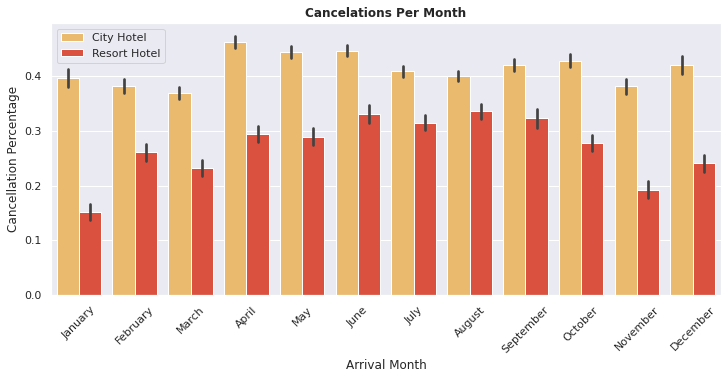

In [ ]:
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sns.barplot(x = "arrival_date_month", y = "is_canceled", hue="hotel",hue_order = ["City Hotel", "Resort Hotel"],data=df,palette= 'YlOrRd')
plt.title("Cancelations Per Month", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("Cancellation Percentage")
plt.legend(loc="best")
plt.show()



*   City Hotel have more cancellations on the month of April, May and June.
*   Resort Hotel have more cancellation on the month of June to Sepetember which has the highest peak of Bookings as well.



# **Cancellations Status by Hotel type**

In [ ]:
df.groupby('is_canceled')['hotel'].value_counts(normalize = True)

is_canceled  hotel       
0            City Hotel      0.618449
             Resort Hotel    0.381551
1            City Hotel      0.749122
             Resort Hotel    0.250878
Name: hotel, dtype: float64

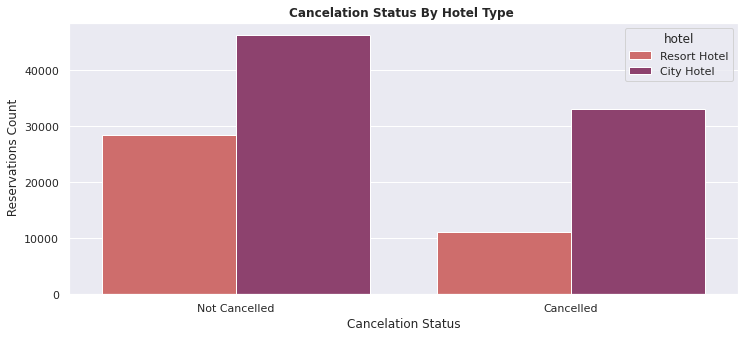

In [ ]:
sns.countplot(x= 'is_canceled',data = df,hue = 'hotel',palette= 'flare')
plt.title("Cancelation Status By Hotel Type ", weight = 'bold')
plt.xlabel("Cancelation Status")
plt.ylabel(" Reservations Count")
plt.show()

#**Average Daily Rate(ADR) and Arrival Month by Booking cancellation status**

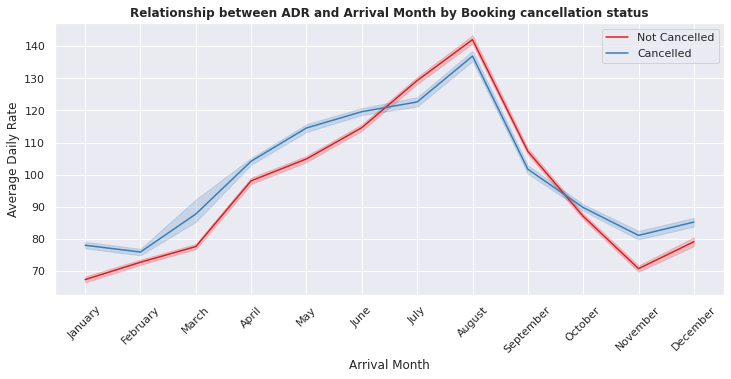

In [ ]:
df.is_canceled.replace((1, 0), ('Cancelled', 'Not Cancelled'), inplace=True)
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
sns.lineplot(x = "arrival_date_month", y = "adr", hue="is_canceled",data=df,palette= 'Set1')
plt.title("Relationship between ADR and Arrival Month by Booking cancellation status", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("Average Daily Rate")
plt.legend(loc="upper right")
plt.show()



*   Whenever the Average Rate is increased we could see the Cancellation Status is also Increased.




# **Total Number of bookings by Market Segment**

In [ ]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Reservation Count')

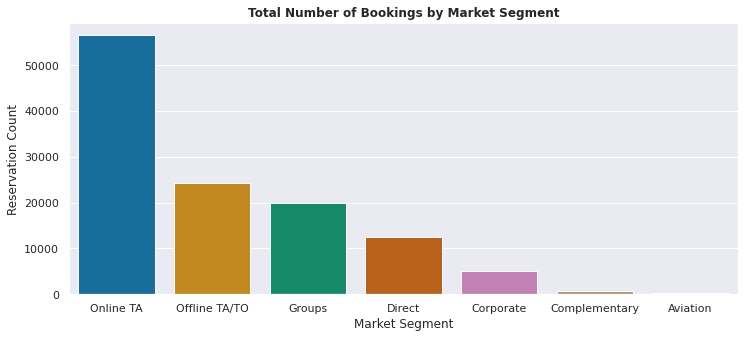

In [ ]:
sns.countplot(df['market_segment'],palette='colorblind',order=pd.value_counts(df['market_segment']).index)
plt.title('Total Number of Bookings by Market Segment', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Reservation Count')



*   Guests Prefered Way of booking is through Online Travel Agency




# **Does lead time affect the Cancellation Status**

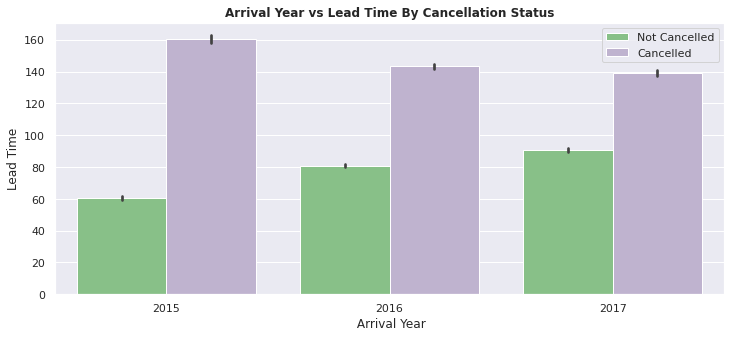

In [ ]:
sns.barplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=df, palette="Accent")
plt.title('Arrival Year vs Lead Time By Cancellation Status', weight='bold')
plt.xlabel(' Arrival Year')
plt.ylabel('Lead Time')
plt.legend(loc = "upper right")



*   Lead time is the time between the time when the Guests made reservation and the Booking date
*   We could see as the Lead time increases there are more number of Cancellations.



# **Effect of Special Request on cancellations**



In [ ]:
df['total_of_special_requests'].value_counts(normalize = True)

0    0.588664
1    0.278567
2    0.108681
3    0.020917
4    0.002851
5    0.000320
Name: total_of_special_requests, dtype: float64

Text(0, 0.5, 'Count')

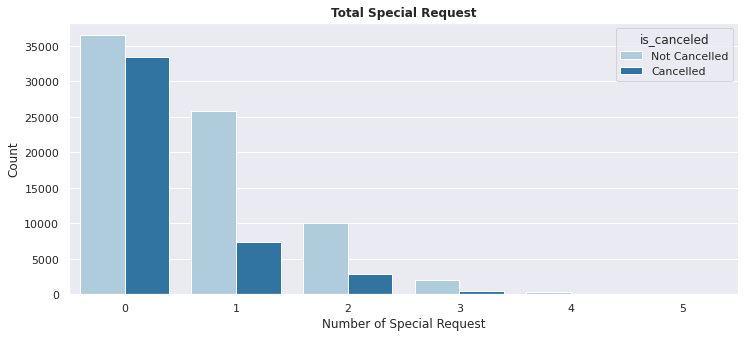

In [ ]:
sns.countplot(x='total_of_special_requests',hue='is_canceled' ,data=df, palette = 'Paired')
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request')
plt.ylabel('Count')



*   Guests without any Special Request have cancelled.
*   Guests who has more number of Special Request are not cancelling.



# **Effect of Repeated Guest on cancellations**





In [ ]:
pd.crosstab(df['is_repeated_guest'],df['is_canceled'],normalize=True)

is_canceled,Cancelled,Not Cancelled
is_repeated_guest,,
0,0.366709,0.601280
1,0.004643,0.027368


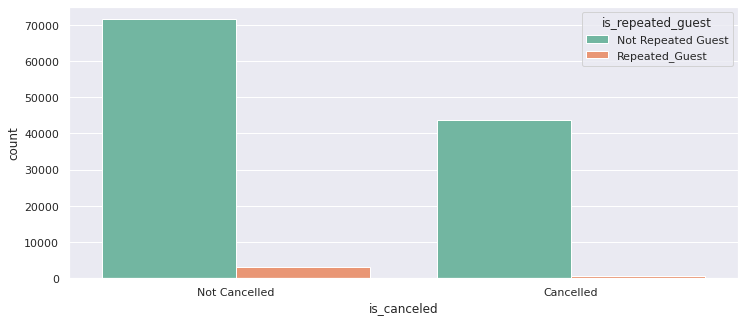

In [ ]:
df.is_repeated_guest.replace((1, 0), ('Repeated_Guest', 'Not Repeated Guest'), inplace=True)
sns.countplot(x= 'is_canceled',hue = 'is_repeated_guest',data = df,palette= 'Set2')



*   Guests who are repeated seems to be loyal to Hotel and hence there are less number of cancellations.




# **Effect of Deposit type on cancellation**




In [ ]:
df['deposit_type'].value_counts(normalize = True)

No Deposit    0.876070
Non Refund    0.122567
Refundable    0.001363
Name: deposit_type, dtype: float64

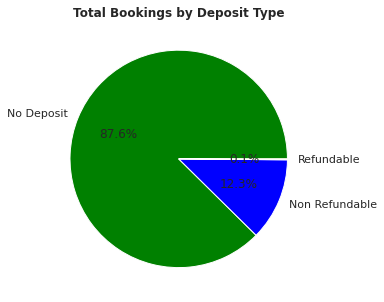

In [ ]:
Seperation = df['deposit_type'].value_counts()
labels = ['No Deposit','Non Refundable','Refundable']
plt.title('Total Bookings by Deposit Type',weight = 'bold')
cols = ['green','blue','yellow']
plt.pie(Seperation,labels=labels, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'white'},colors =cols)
plt.show()

In [ ]:
df.groupby('deposit_type')['is_canceled'].value_counts(normalize = True)

deposit_type  is_canceled  
No Deposit    Not Cancelled    0.715475
              Cancelled        0.284525
Non Refund    Cancelled        0.993618
              Not Cancelled    0.006382
Refundable    Not Cancelled    0.777778
              Cancelled        0.222222
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

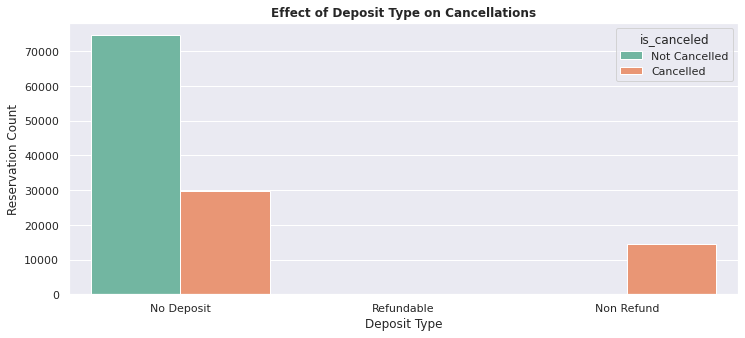

In [ ]:
sns.countplot(x= 'deposit_type',hue = 'is_canceled',data = df,palette= 'Set2')
plt.title('Effect of Deposit Type on Cancellations',weight = 'bold')
plt.xlabel('Deposit Type')
plt.ylabel('Reservation Count')

# **Effect of Meal type on Cancellations**

In [ ]:
df.groupby('meal')['is_canceled'].value_counts(normalize = True)

meal       is_canceled  
BB         Not Cancelled    0.624963
           Cancelled        0.375037
FB         Cancelled        0.598997
           Not Cancelled    0.401003
HB         Not Cancelled    0.654912
           Cancelled        0.345088
SC         Not Cancelled    0.628126
           Cancelled        0.371874
Undefined  Not Cancelled    0.754506
           Cancelled        0.245494
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

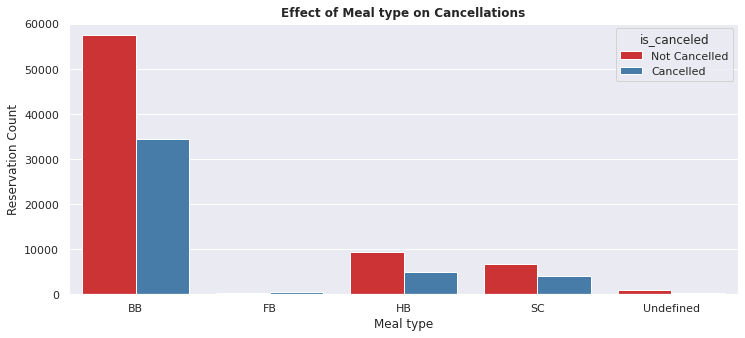

In [ ]:
sns.countplot(x= 'meal',hue = 'is_canceled',data = df,palette= 'Set1')
plt.title ('Effect of Meal type on Cancellations',weight = 'bold')
plt.xlabel("Meal type")
plt.ylabel('Reservation Count')

# **Effect of car parking spaces on cancellations**

In [ ]:
df.groupby('required_car_parking_spaces')['is_canceled'].value_counts(normalize = True)

required_car_parking_spaces  is_canceled  
0                            Not Cancelled    0.604321
                             Cancelled        0.395679
1                            Not Cancelled    1.000000
2                            Not Cancelled    1.000000
3                            Not Cancelled    1.000000
8                            Not Cancelled    1.000000
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation Count')

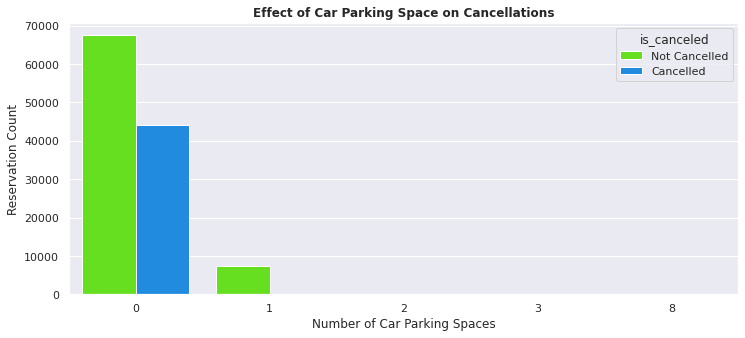

In [ ]:
sns.countplot(x= 'required_car_parking_spaces',hue = 'is_canceled',data = df,palette= 'gist_rainbow')
plt.title ('Effect of Car Parking Space on Cancellations',weight = 'bold')
plt.xlabel("Number of Car Parking Spaces")
plt.ylabel('Reservation Count')